## Dependency parsing with UDPipe

Зависимостный парсинг - одна из немногих задач, где лингвистика и компьютерные науки продуктивно взаимодействуют. Основную теорию тут разрабатывают лингвисты, они же размечают корпусы, а модели построены на самых последних разработках в области машинного обучения.

**Что такое парсинг вообще и в какой момент его нужно использовать?**

Сначала мы токенизируем текст и лемматизируем (делаем морфологический разбор), а потом мы переходим к **синтаксису** и вот тут-то нам и нужен парсер.

Самые популярные парсеры:
    
**Syntaxnet (DRAGNN)** - от гугла
    
**UDPipe** - от Карлова Университета в Чехии
    
SyntaxNet активно развивается, но его достаточно трудоемко ставить. 
UdPipe работает похуже, но установить его легче.

**TurkuNLP** - от университета Турку (это Финляндия). Позиционируется он как парсер для финского, но там есть много других предобученных моделей и можно обучать свои. 


Если вам нужен английский, то удобнее всего разбирать предложения через **spacy**.

Ещё есть **MaltParser**: http://www.maltparser.org/


### Universal Dependencies Parser

[Great tutorial](https://habr.com/ru/company/sberbank/blog/418701/)

При парсинге русского языка используется грамматика зависимостей, а не грамматика составляющих. Так любое предложение можно представить в виде дерева зависимостей.

![](https://habrastorage.org/getpro/habr/post_images/4b3/b16/19d/4b3b1619db261a71dfd749c28b4fde31.png)

[**Universal Dependencies**](https://universaldependencies.org/) — это проект по унификации разметки синтаксических корпусов (трибанков) в рамках грамматики зависимостей. В русском языке количество типов синтаксических связей ограничено — подлежащее, сказуемое и т.д. В английском то же самое, но набор уже другой. Например, там появляется артикль, который тоже надо как-то маркировать. Если бы мы хотели написать волшебный парсер, который мог бы обрабатывать все языки, то довольно быстро уперлись бы в проблемы сопоставления разных грамматик. Героическим создателям Universal Dependencies удалось договориться между собой и разметить все корпусы, которые имелись в их распоряжении, в едином формате.

Для того, чтобы разметить что-то новое, нужно обучить модель на размеченном корпусе. Таких корпусов для русского языка есть несколько (можно посмотреть на сайте Universal Dependencies). Основные и самые большие размеченные корпуса:
+ Syntagrus
+ Taiga

### UDPipe 2.0, принцип работы

+ Сначала текст разделяется на предложения, а предложения — на слова.
+ Затем начинает работу теггер — штука, которая предсказывает морфологические свойства токена: в каком падеже слово стоит, в каком числе. По последним четырем символам каждого слова теггер генерирует гипотезы относительно части речи и морфологических тегов этого слова, а затем при помощи перцептрона отбирает лучший вариант.
+ В UDPipe есть еще лемматизатор, который подбирает для слов начальную форму. 
+ потом происходит синтаксический парсинг

В итоге получается какой-то такой разбор по грамматике зависимостей предложения:

![](https://habrastorage.org/getpro/habr/post_images/686/c78/066/686c780661b296250d53cba054317a18.png)

### Давайте вот тут поиграем вместе и попробуем онлайн-парсинг предложений в UDPipe для русского языка.

Перейдем по ссылке: http://lindat.mff.cuni.cz/services/udpipe/run.php

+ Сначала надо выбрать корпус syntagrus. 
+ Потом можно вводить свои предложения и рисовать для них таблицы и деревья.

![](koshka.png)

## Как теперь сделать эту красоту в питоне?

In [0]:
import warnings
import os
warnings.filterwarnings('ignore')

In [0]:
! pip install ufal.udpipe

     |████████████████████████████████| 307kB 4.9MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp36-cp36m-linux_x86_64.whl size=5625822 sha256=b423e0fcc8fe72483d2e2637dc8479ae0ca5fdbd01de7cab8006c4530ef1d05b
  Stored in directory: /root/.cache/pip/wheels/0c/9d/db/6d3404c33da5b7adb6c6972853efb6a27649d3ba15f7e9bebb
Successfully built ufal.udpipe


In [0]:
! pip install conllu

model.py - это вспомогательный скрипт. Скачайте его себе с нашего гитхаба.

In [0]:
import ufal.udpipe
from model import Model
import conllu

In [0]:
from collections import defaultdict

Скачать модель можно [отсюда](https://lindat.mff.cuni.cz/repository/xmlui/handle/11234/1-2998). Либо taiga, либо syntagrus.

In [0]:
model = Model('russian-taiga-ud-2.4-190531.udpipe')

In [0]:
def get_conllu(model, text):
    sentences = model.tokenize(text)
    for s in sentences:
        model.tag(s)
        model.parse(s)
    conllu_text = model.write(sentences, "conllu")
    return conllu_text

Распарсим какое-нибдуь предложение. Функция get_conllu вернёт табличку с анализом каждого слова

In [32]:
a = get_conllu(model, 'Я был в деревне целый день. И завтра тоже там буду.')
print(a)

# newdoc
# newpar
# sent_id = 1
# text = Я был в деревне целый день.
1	Я	я	PRON	_	Case=Nom|Number=Sing|Person=1	6	nsubj	_	_
2	был	быть	AUX	VERB	Aspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	6	cop	_	_
3	в	в	ADP	_	_	4	case	_	_
4	деревне	деревна	NOUN	_	Animacy=Inan|Case=Loc|Gender=Masc|Number=Sing	6	nmod	_	_
5	целый	целый	ADJ	_	Animacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing	6	amod	_	_
6	день	день	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	0	root	_	SpaceAfter=No
7	.	.	PUNCT	_	_	6	punct	_	_

# sent_id = 2
# text = И завтра тоже там буду.
1	И	и	CCONJ	_	_	4	cc	_	_
2	завтра	завтра	ADV	_	Degree=Pos	4	advmod	_	_
3	тоже	тоже	PART	_	_	4	advmod	_	_
4	там	там	ADV	_	Degree=Pos	0	root	_	_
5	буду	быть	AUX	_	Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act	4	cop	_	SpaceAfter=No
6	.	.	PUNCT	_	_	4	punct	_	SpaceAfter=No




In [33]:
conllu.parse_tree(a)

[TokenTree<token={id=6, form=день}, children=[...]>,
 TokenTree<token={id=4, form=там}, children=[...]>]

Получается, что это список из объектов, по одному для каждого предложения. Каждое предложение представляет собой дерево.

In [34]:
len(conllu.parse_tree(a))

2

In [0]:
first_tree = conllu.parse_tree(a)[1]

In [38]:
first_tree.print_tree()  # вот это на винде не работает, запускайте в google colab

(deprel:root) form:там lemma:там upostag:ADV [4]
    (deprel:cc) form:И lemma:и upostag:CCONJ [1]
    (deprel:advmod) form:завтра lemma:завтра upostag:ADV [2]
    (deprel:advmod) form:тоже lemma:тоже upostag:PART [3]
    (deprel:cop) form:буду lemma:быть upostag:AUX [5]
    (deprel:punct) form:. lemma:. upostag:PUNCT [6]


In [0]:
from nltk.parse import DependencyGraph

Разобранные предложения хранятся в формате CONLL (слово на каждой строчке, тэги через табы, предложения отделены двойными отступами). Conll - по названию конференции Conference on Computational Natural Language Learning, в рамках который проводились и проводятся соревнования по парсингу. 

Визуализация это дерева DependencyGraph работает с форматом CONLL, поэтому напишем функцию, которая добавит в наш разбор табы и двойные отступы `get_dep_tree`.


In [0]:
def get_dep_tree(text):
    trees = []
    for sent in text.split('\n\n'):
        tree = [line for line in sent.split('\n') if line and line[0] != '#']
        trees.append('\n'.join(tree))
    return trees

In [41]:
print(a)

# newdoc
# newpar
# sent_id = 1
# text = Я был в деревне целый день.
1	Я	я	PRON	_	Case=Nom|Number=Sing|Person=1	6	nsubj	_	_
2	был	быть	AUX	VERB	Aspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	6	cop	_	_
3	в	в	ADP	_	_	4	case	_	_
4	деревне	деревна	NOUN	_	Animacy=Inan|Case=Loc|Gender=Masc|Number=Sing	6	nmod	_	_
5	целый	целый	ADJ	_	Animacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing	6	amod	_	_
6	день	день	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	0	root	_	SpaceAfter=No
7	.	.	PUNCT	_	_	6	punct	_	_

# sent_id = 2
# text = И завтра тоже там буду.
1	И	и	CCONJ	_	_	4	cc	_	_
2	завтра	завтра	ADV	_	Degree=Pos	4	advmod	_	_
3	тоже	тоже	PART	_	_	4	advmod	_	_
4	там	там	ADV	_	Degree=Pos	0	root	_	_
5	буду	быть	AUX	_	Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act	4	cop	_	SpaceAfter=No
6	.	.	PUNCT	_	_	4	punct	_	SpaceAfter=No




In [0]:
b = get_dep_tree(a)

In [43]:
b  # Вот он этот CONLL формат

['1\tЯ\tя\tPRON\t_\tCase=Nom|Number=Sing|Person=1\t6\tnsubj\t_\t_\n2\tбыл\tбыть\tAUX\tVERB\tAspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act\t6\tcop\t_\t_\n3\tв\tв\tADP\t_\t_\t4\tcase\t_\t_\n4\tдеревне\tдеревна\tNOUN\t_\tAnimacy=Inan|Case=Loc|Gender=Masc|Number=Sing\t6\tnmod\t_\t_\n5\tцелый\tцелый\tADJ\t_\tAnimacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing\t6\tamod\t_\t_\n6\tдень\tдень\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Masc|Number=Sing\t0\troot\t_\tSpaceAfter=No\n7\t.\t.\tPUNCT\t_\t_\t6\tpunct\t_\t_',
 '1\tИ\tи\tCCONJ\t_\t_\t4\tcc\t_\t_\n2\tзавтра\tзавтра\tADV\t_\tDegree=Pos\t4\tadvmod\t_\t_\n3\tтоже\tтоже\tPART\t_\t_\t4\tadvmod\t_\t_\n4\tтам\tтам\tADV\t_\tDegree=Pos\t0\troot\t_\t_\n5\tбуду\tбыть\tAUX\t_\tAspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\tSpaceAfter=No\n6\t.\t.\tPUNCT\t_\t_\t4\tpunct\t_\tSpaceAfter=No',
 '']

In [0]:
d = DependencyGraph(b[1])

In [0]:
edges = []

for e in d.nodes:
    for dep in d.nodes[e]['deps']:
        for t in d.nodes[e]['deps'][dep]:
            edges.append((e, t))

Нарисуем. Какая-то фигня получилась. Но это и выше было видно.



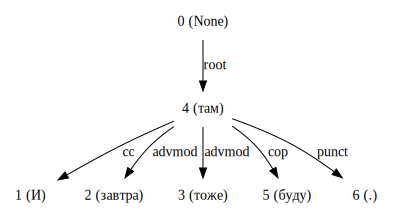

In [46]:
d

У графа можно достать все **узлы** с помощью метода triples

In [50]:
d.root = d.nodes[0]  # чтобы метод сработал нужно установить корневой элемент
# при этом, если в разборе ошибка и вы сичтаете, что root - это d.nodes[5],
# использовать этот корень в .triples не получится, будет ошибка
d.nodes[5]

{'address': 5,
 'ctag': 'AUX',
 'deps': defaultdict(list, {}),
 'feats': 'Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act',
 'head': 4,
 'lemma': 'быть',
 'rel': 'cop',
 'tag': '_',
 'word': 'буду'}

In [53]:
list(d.triples())

[((None, 'TOP'), 'root', ('там', 'ADV')),
 (('там', 'ADV'), 'cc', ('И', 'CCONJ')),
 (('там', 'ADV'), 'advmod', ('завтра', 'ADV')),
 (('там', 'ADV'), 'advmod', ('тоже', 'PART')),
 (('там', 'ADV'), 'cop', ('буду', 'AUX')),
 (('там', 'ADV'), 'punct', ('.', 'PUNCT'))]

Запомним, что теперь у нас есть способ доставать все узлы. И попробуем использовать это на какой-нибудь задаче.

Попробуем проанализировать тексты с помощью зависимостей. Сами парсить не будет, а возьмем уже готовые разборы из Тайги.

Возьмем маленький кусочек (Arzamas) - скачать его можно тут - https://linghub.ru/static/Taiga/Arzamas.zip

В нем есть папка с обработанными текстами. Соберем их в один список.

Нашим конечным заданием будет достать все модификаторы для какого-нибудь конкретного слова в этом корпусе.

In [55]:
! wget https://linghub.ru/static/Taiga/Arzamas.zip

--2019-12-12 22:06:52--  https://linghub.ru/static/Taiga/Arzamas.zip
Resolving linghub.ru (linghub.ru)... 92.242.58.138
Connecting to linghub.ru (linghub.ru)|92.242.58.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8110992 (7.7M) [application/zip]
Saving to: ‘Arzamas.zip’

Arzamas.zip         100%[===================>]   7.73M  1.55MB/s    in 7.8s    

2019-12-12 22:07:01 (1018 KB/s) - ‘Arzamas.zip’ saved [8110992/8110992]



In [0]:
!unzip Arzamas.zip

In [0]:
path = 'Arzamas/texts_tagged/'
files = [path+file for file in os.listdir(path)]

Посмотрим, что вообще лежит в этих файлах:

In [0]:
file = open(files[2]).read()

In [0]:
tree = [x for x in file.split('\n\n')[0].split('\n')]

Тут снова формат CONLL очевидно. Давайте еще раз на него внимательно посмотрим. У нас есть тут какая-то метаинформация черз #, теги через таб, деревья для отдельных предложений.

In [73]:
tree

['# text = # newpar',
 '# sent_id = 6367',
 '# text = Так, как полагают специалисты, звучал аккадский, или ассиро-вавилонский, язык -- один из древнейших семитских языков.',
 '1\tТак\tтак\tADV\t_\tDegree=Pos\t7\tparataxis\t_\tSpaceAfter=No',
 '2\t,\t,\tPUNCT\t_\t_\t1\tpunct\t_\t_',
 '3\tкак\tкак\tSCONJ\t_\t_\t7\tmark\t_\t_',
 '4\tполагают\tполагать\tVERB\t_\tAspect=Imp|Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t7\tparataxis\t_\t_',
 '5\tспециалисты\tспециалист\tNOUN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Plur\t4\tnsubj\t_\tSpaceAfter=No',
 '6\t,\t,\tPUNCT\t_\t_\t5\tpunct\t_\t_',
 '7\tзвучал\tзвучать\tVERB\t_\tAspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_',
 '8\tаккадский\tаккадский\tADJ\t_\tCase=Nom|Degree=Pos|Gender=Masc|Number=Sing\t13\tamod\t_\tSpaceAfter=No',
 '9\t,\t,\tPUNCT\t_\t_\t8\tpunct\t_\t_',
 '10\tили\tили\tCCONJ\t_\t_\t11\tcc\t_\t_',
 '11\tассиро-вавилонский\tассиро-вавилонский\tNOUN\t_\tAnimacy=Ani

In [74]:
tree = [x for x in file.split('\n\n')[1].split('\n')]
tree

['# sent_id = 6368',
 '# text = На нем в Древней Месопотамии разговаривали аккадцы, ассирийцы и вавилоняне.',
 '1\tНа\tна\tADP\t_\t_\t2\tcase\t_\t_',
 '2\tнем\tон\tPRON\t_\tCase=Loc|Gender=Masc|Number=Sing|Person=3\t6\tobl\t_\t_',
 '3\tв\tв\tADP\t_\t_\t5\tcase\t_\t_',
 '4\tДревней\tдревний\tADJ\t_\tCase=Loc|Degree=Pos|Gender=Fem|Number=Sing\t5\tamod\t_\t_',
 '5\tМесопотамии\tМесопотамия\tPROPN\t_\tAnimacy=Inan|Case=Loc|Gender=Fem|Number=Sing\t6\tobl\t_\t_',
 '6\tразговаривали\tразговаривать\tVERB\t_\tAspect=Imp|Mood=Ind|Number=Plur|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_',
 '7\tаккадцы\tаккадец\tNOUN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Plur\t6\tnsubj\t_\tSpaceAfter=No',
 '8\t,\t,\tPUNCT\t_\t_\t7\tpunct\t_\t_',
 '9\tассирийцы\tассириец\tNOUN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Plur\t7\tconj\t_\t_',
 '10\tи\tи\tCCONJ\t_\t_\t11\tcc\t_\t_',
 '11\tвавилоняне\tвавилонянин\tNOUN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Plur\t7\tconj\t_\tSpaceAfter=No',
 '12\t.\t

Соберем все деревья (то есть все предложения) из всех файлов в один список. Так мы сможем работать с этими данными как с корпусом текстов.

In [0]:
trees = []

for file in files:
    parsed_sents = open(file).read().split('\n\n')
    
    for sent in parsed_sents:
        # уберем мета информацию
        tree = [line for line in sent.split('\n') if line[0] != '#']
        trees.append('\n'.join(tree))

Рандомное дерево из получившившегося списка:

In [96]:
trees[145]

'1\tГравюры\tГравюр\tNOUN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Plur\t3\tnsubj\t_\t_\n2\tГилрея\tГилрей\tPROPN\t_\tAnimacy=Inan|Case=Gen|Gender=Masc|Number=Sing\t1\tnmod\t_\t_\n3\tпреодолевают\tпреодолевавать\tVERB\t_\tAspect=Imp|Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tзаконы\tзакон\tNOUN\t_\tAnimacy=Inan|Case=Nom|Gender=Masc|Number=Plur\t3\tobj\t_\t_\n5\tжанра\tжанр\tNOUN\t_\tAnimacy=Inan|Case=Gen|Gender=Masc|Number=Sing\t4\tnmod\t_\t_\n6\tи\tи\tCCONJ\t_\t_\t7\tcc\t_\t_\n7\tрамки\tрамка\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Fem|Number=Plur\t5\tconj\t_\t_\n8\tкомического\tкомический\tADJ\t_\tCase=Gen|Degree=Pos|Gender=Masc|Number=Sing\t7\tnmod\t_\tSpaceAfter=No\n9\t,\t,\tPUNCT\t_\t_\t8\tpunct\t_\t_\n10\tвозвышаясь\tвозвышаться\tVERB\t_\tAspect=Imp|Tense=Pres|VerbForm=Conv|Voice=Mid\t3\tadvcl\t_\t_\n11\tдо\tдо\tADP\t_\t_\t14\tcase\t_\t_\n12\tобобщающих\tобобщать\tVERB\t_\tAspect=Imp|Case=Gen|Number=Plur|Tense=Pres|VerbForm=Part|Voice=Ac

Пора нарисовать красивый граф для какого-нибудь предложения из этого корпуса.

Поскольку это данные, на которых можно обучать модели, они хорошо размечены и тут уже в корне дерева у нас нормальный предикат и разбор получается хороший.

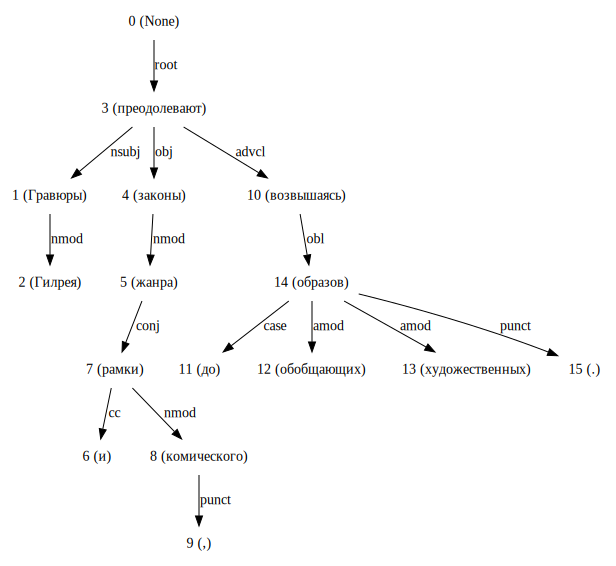

In [95]:
 d1 = DependencyGraph(trees[145])
 d1

Вспомним наш прекрасный метод доставания узлов:

In [98]:
d1.root = d1.nodes[0] # чтобы метод сработал нужно установить корневой элемент
list(d1.triples())

[((None, 'TOP'), 'root', ('преодолевают', 'VERB')),
 (('преодолевают', 'VERB'), 'nsubj', ('Гравюры', 'NOUN')),
 (('Гравюры', 'NOUN'), 'nmod', ('Гилрея', 'PROPN')),
 (('преодолевают', 'VERB'), 'obj', ('законы', 'NOUN')),
 (('законы', 'NOUN'), 'nmod', ('жанра', 'NOUN')),
 (('жанра', 'NOUN'), 'conj', ('рамки', 'NOUN')),
 (('рамки', 'NOUN'), 'cc', ('и', 'CCONJ')),
 (('рамки', 'NOUN'), 'nmod', ('комического', 'ADJ')),
 (('комического', 'ADJ'), 'punct', (',', 'PUNCT')),
 (('преодолевают', 'VERB'), 'advcl', ('возвышаясь', 'VERB')),
 (('возвышаясь', 'VERB'), 'obl', ('образов', 'NOUN')),
 (('образов', 'NOUN'), 'case', ('до', 'ADP')),
 (('образов', 'NOUN'), 'amod', ('обобщающих', 'VERB')),
 (('образов', 'NOUN'), 'amod', ('художественных', 'ADJ')),
 (('образов', 'NOUN'), 'punct', ('.', 'PUNCT'))]

А теперь поставим задачу:

Как достать из корпуса все возможные модификаторы какого-нибудь слова?

In [0]:
modifiers = Counter()
for tree in trees:
    d = DependencyGraph(tree)
    d.root = d.nodes[0] 
    triples = list(d.triples())
    
    for e1, rel, e2 in triples:
        if e1[0] == 'писатель' and rel == 'amod':
            modifiers[e2[0]] += 1

In [100]:
modifiers

Counter({'Британский': 1,
         'Замечательный': 1,
         'Сам': 1,
         'великий': 2,
         'грузинский': 2,
         'древнегреческий': 1,
         'известный': 1,
         'изощренный': 1,
         'любимый': 1,
         'московский': 2,
         'наш': 1,
         'оказавшийся': 1,
         'разоблаченный': 1,
         'русский': 1,
         'умеющий': 1,
         'церковный': 1})

Попробуйте сами так поиграть с еще какими-нибудь словами и достать еще какие-нибудь отношения.

In [0]:
modifiers = Counter()
for tree in trees:
    d = DependencyGraph(tree)
    d.root = d.nodes[0] 
    triples = list(d.triples())
    
    for e1, rel, e2 in triples:
        if e1[0] == 'девочка' and rel == 'amod':
            modifiers[e2[0]] += 1

In [106]:
modifiers

Counter({'маленькая': 1, 'наша': 1})

Какие вообще отношения в Universal Dependencies маркируются для русского языка?

https://universaldependencies.org/ru/index.html

Какие еще вопросы можно решать с помощью UDPipe? 

+ Можно доставать какую-нибудь составляющую. Например, достать из всех предложений вашего корпуса именные группы.
+ Доставать самые короткие пути (пути по графу зависимостей), соединяющие между собой какие-нибудь фразы.
+ Можно искать предложения или конструкции, похожие между собой по структуре (вот это топовая тема для CG construction grammar) на мой взгляд.

В оставшееся время давайте попробуем накидать решение для первой задачи из этого списка. 

Пройдемся по всем ответвлениям слова, чтобы собрать всю именную группу. Для этого напишем функцию с рекурсией, которая будет делать примерно следующее: преобазовывать какую-то такую структуру [1, [2, 3], 4, [5, 6]] в плоскую [1, 2, 3, 4, 5, 6].

In [0]:
def get_subtree(nodes, node):
    
    if not nodes[node]['deps']:
        return [node]
    
    else:
        return [node] + [get_subtree(nodes, dep) for rel in nodes[node]['deps'] 
                         if rel != 'punct'  # пунктуацию доставать не будем
                         for dep in nodes[node]['deps'][rel]]

Давайте снова нарисуем предложение (и вспомним его), для которого мы хотим достать поддеревья или на языке лингвистики: найдем существительное, именную группу которого мы хотим достать.

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

Ну, например, давайте достанем именную группу или поддерево для существительного *образов*

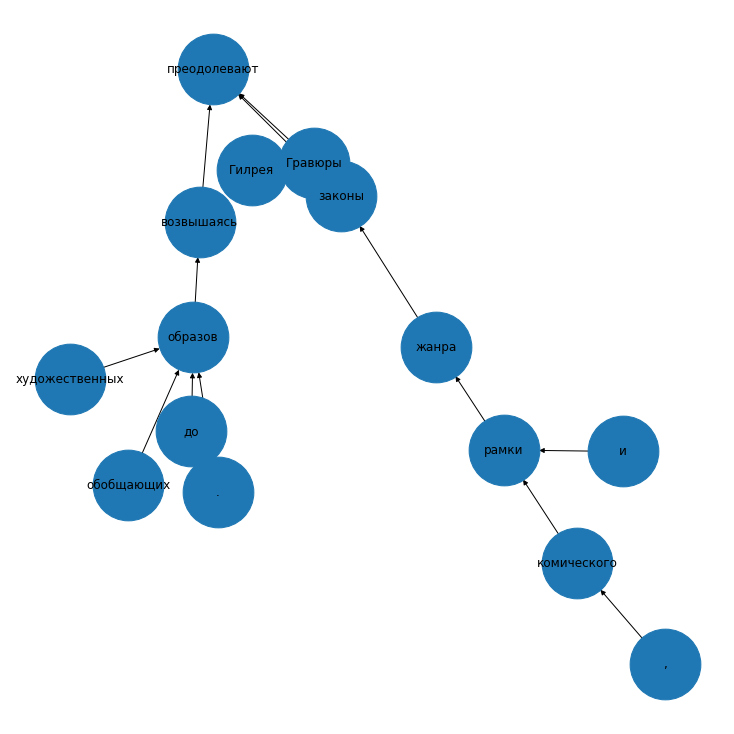

In [110]:
plt.figure(figsize=(10,10))
nx.draw(d1.nx_graph(), labels=d1.nx_labels, node_size=5000)

Это слово лежит здесь 14-ым

In [111]:
d1.nx_labels

{1: 'Гравюры',
 2: 'Гилрея',
 3: 'преодолевают',
 4: 'законы',
 5: 'жанра',
 6: 'и',
 7: 'рамки',
 8: 'комического',
 9: ',',
 10: 'возвышаясь',
 11: 'до',
 12: 'обобщающих',
 13: 'художественных',
 14: 'образов',
 15: '.'}

In [114]:
get_subtree(d1.nodes, 14)

[14, [11], [12], [13]]

Получается список с вложенными списками. Чтобы представить это все в читаемом формате лучше его раплющить ещё одной рекурсивной функцией

In [0]:
def flatten(l):
    flat = []
    for el in l:
        if not isinstance(el, list):
            flat.append(el)
        else:
            flat += flatten(el)
    return flat

In [117]:
flatten(get_subtree(d1.nodes, 14))

[14, 11, 12, 13]

In [119]:
[d1.nodes[i]['word'] for i in flatten(get_subtree(d1.nodes, 14))]

['образов', 'до', 'обобщающих', 'художественных']

Ну вот мы что-то напечатали, но поскольку там был словарь, порядок слов поломался надо сортировать и напечатать нормально.

In [121]:
" ".join([d1.nodes[i]['word'] for i in sorted(flatten(get_subtree(d1.nodes, 14)))])

'до обобщающих художественных образов'

Ура! А что теперь?

## Задание

Ну теперь можно достать все именные группы для слов с тегом nsubj. То есть достать все именные группы в именительном падеже

In [0]:
# your code here